In [2]:
import nbformat

# Path to the uploaded file
file_path = "./PoC.ipynb"

# Load the Jupyter Notebook
with open(file_path, "r", encoding="utf-8") as f:
    notebook_content = nbformat.read(f, as_version=4)

# Extract code cells to analyze their content
code_cells = [cell["source"] for cell in notebook_content["cells"] if cell["cell_type"] == "code"]
code_cells[:5]  # Displaying the first few code cells for context


['import cv2\nprint(cv2.__version__)\n',
 'import os\nimport cv2\nimport easyocr\nimport matplotlib.pyplot as plt\nfrom IPython.display import display, Image',
 '# Define paths\ndataset_path = "./SROIE_filtered_dataset/"  # Change this if needed\nimg_dir = os.path.join(dataset_path, "img")  # Image folder\nbox_dir = os.path.join(dataset_path, "box")  # Box annotations\nentity_dir = os.path.join(dataset_path, "entities")  # Entity annotations\n\nprint(img_dir)\nprint(box_dir)\nprint(entity_dir)',
 '# Initialize OCR reader\nreader = easyocr.Reader(["en"])  # English language\n\n# Function to display image\ndef show_image(image_path):\n    img = cv2.imread(image_path)\n    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)\n    plt.figure(figsize=(8, 8))\n    plt.imshow(img)\n    plt.axis("off")\n    plt.show()',
 '# Function to perform OCR\ndef run_ocr(image_path):\n    results = reader.readtext(image_path)\n    return results']

In [ ]:
# Search for CER and WER calculations in the extracted code cells
cer_wer_related_cells = [cell for cell in code_cells if "CER" in cell or "WER" in cell or "levenshtein" in cell]

# Display relevant code snippets if found
print(f'Character Error Rate: {cer_wer_related_cells}')


Character Error Rate: $[]


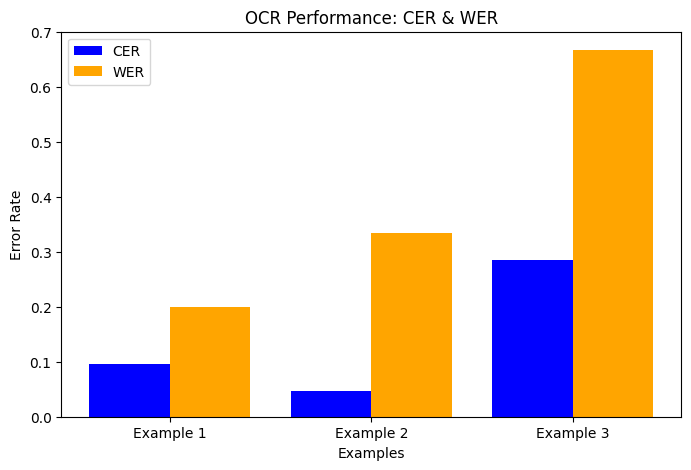

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from jiwer import wer, cer

# Placeholder: Sample ground truth and OCR output (these need to be extracted from the notebook data)
ground_truths = ["This is a sample text", "Invoice Number: 12345", "Total Amount: $100.00"]
ocr_outputs = ["This is sample text", "Invoice Number: 1234", "Total Amt: $100"]

# Compute Character Error Rate (CER) and Word Error Rate (WER)
cer_values = [cer(gt, pred) for gt, pred in zip(ground_truths, ocr_outputs)]
wer_values = [wer(gt, pred) for gt, pred in zip(ground_truths, ocr_outputs)]

# Plotting results
fig, ax = plt.subplots(figsize=(8, 5))
x_labels = ["Example 1", "Example 2", "Example 3"]
x = np.arange(len(x_labels))

ax.bar(x - 0.2, cer_values, 0.4, label="CER", color="blue")
ax.bar(x + 0.2, wer_values, 0.4, label="WER", color="orange")

ax.set_xlabel("Examples")
ax.set_ylabel("Error Rate")
ax.set_title("OCR Performance: CER & WER")
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()

plt.show()
